In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = 'F:/jeevanthask/research/datasets/malvismyowndata'
# CATEGORIES = ["Adposhel","Agent","Allaple","Other"]
CATEGORIES = ["benign","malcious"]

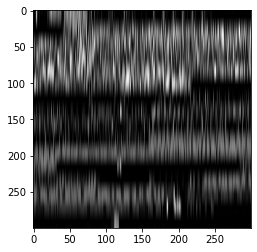

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [4]:
print(img_array)

[[117   3   8 ...   0   0   0]
 [115   3   8 ...   0   0   0]
 [113   3   8 ...   0   0   0]
 ...
 [  2   2   2 ...   0   1   2]
 [  2   2   3 ...   1   1   2]
 [  2   2   3 ...   1   1   2]]


In [5]:
print(img_array.shape)

(300, 300)


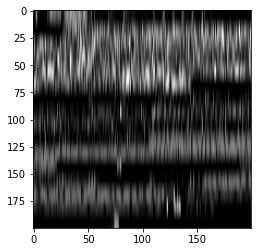

In [6]:
IMG_SIZE = 200

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [7]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [8]:
print(len(training_data))

3977


In [9]:
import random
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
0
1
1
0
0


In [11]:
X = []
y = []

In [12]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [13]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [16]:
X[1]

array([[[ 51],
        [  4],
        [ 41],
        ...,
        [ 19],
        [  7],
        [ 20]],

       [[ 85],
        [ 77],
        [ 41],
        ...,
        [ 39],
        [ 38],
        [ 29]],

       [[ 52],
        [ 49],
        [ 54],
        ...,
        [131],
        [162],
        [154]],

       ...,

       [[ 57],
        [ 69],
        [ 51],
        ...,
        [ 40],
        [ 44],
        [ 19]],

       [[137],
        [124],
        [106],
        ...,
        [126],
        [127],
        [ 87]],

       [[131],
        [133],
        [147],
        ...,
        [ 35],
        [ 42],
        [ 48]]], dtype=uint8)